In [2]:
# SOAL 1

import pandas as pd
# Buat data penjualan toko
data = {
    "Tanggal": ["2025-02-01", "2025-02-01", "2025-02-02", "2025-02-02", "2025-02-03","2025-02-03","2025-02-04","2025-02-04","2025-02-05","2025-02-05"],
    "Produk": ["Buku Tulis", "Buku LKS", "Buku Paket", "Pulpen","Pensil","Penghapus","Tip-x","Solatip","Pin Kertas","Lem"],
    "Jumlah Terjual": [10, 5, 7, 3, 12, 8, 12, 6, 9,4],
    "Stok": [20,15,8,12,25,10,20,10,12,14],
    "Harga Satuan": [10000, 12000, 15000, 15000, 13000, 12000,15000,12000,10000,15000],
}

#Simpan dalam DataFrame
df = pd.DataFrame(data)

#Simpan sebagai file CSV
df.to_csv("Data_penjualan_latihan.csv", index=False)

print("File.CSV berhasil dibuat dan disimpan sebagai 'Data_penjualan_latihan.csv'!")


File.CSV berhasil dibuat dan disimpan sebagai 'data_penjualan.csv'!


In [ ]:
#SOAL 2
import pandas as pd
#Membaca file CSV
df = pd.read_csv("Data_penjualan_latihan.csv")

#Cek apakah ada data yang kosong
print(df.isnull().sum())

#Konversi kolom "Tanggal" ke format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

#Tambahkan kolom "Total Penjualan"
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

#Tambahkan kolom "Keuntungan" (asumsi modal 10.000 per produk)
df["Keuntungan"] = df["Total Penjualan"] - (df['Jumlah Terjual'] * 10000)

#Menampilkan hasil transformasi
print(df.head())

In [7]:
#SOAL 3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


#Membaca file CSV
df = pd.read_csv("Data_penjualan_latihan.csv")

#Pilih fitur (x) dan target (y)
X = df[["Jumlah Terjual","Stok"]]
Y = (df["Stok"]< 5).astype(int) #1 jika stok kurang dari 5, 0 jika cukup

#Split data menjadi train dan test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

#Buat model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

#Evaluasi model
Y_pred = model.predict(X_test)
print("Akurasi model:", accuracy_score(Y_test, Y_pred))



Akurasi model: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Stok masih cukup.


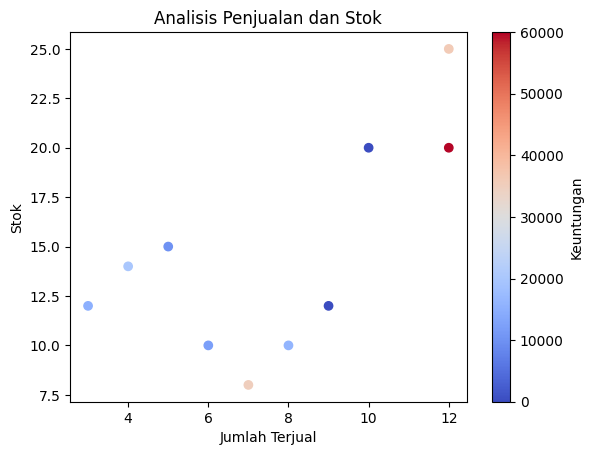

In [8]:
#SOAL 4
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


#Membaca file CSV
df = pd.read_csv("Data_penjualan_latihan.csv")

# Tambahkan kolom "Perlu Restock"
df["Perlu Restock"] = df["Stok"].apply(lambda x: 1 if x < 5 else 0)

#Pilih fitur (x) dan target (y)
X = df[["Jumlah Terjual","Stok"]]
Y = (df["Stok"]< 5).astype(int) #1 jika stok kurang dari 5, 0 jika cukup

#Split data menjadi train dan test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

#Buat model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

#Contoh produk baru (jumlah terjual 8, stok tersisa 3)
produk_baru = [[8,3]]
prediksi = model.predict(produk_baru)

if prediksi [0]==1:
  print("Produk perlu di-resrock!")
else:
  print("Stok masih cukup.")
#Tambahkan kolom "Total Penjualan"
df["Total Penjualan"] = df['Jumlah Terjual']*df['Harga Satuan']

#Tambahkan kolom "Keuntungan" (asumsi modal 10.000 per produk)
df["Keuntungan"] = df["Total Penjualan"] - (df['Jumlah Terjual'] * 10000)

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar(label="Keuntungan")
plt.show()